## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd

In [0]:
labels = pd.read_csv('labels.csv')

In [9]:
labels.sample(5)

,id,breed
5862,93e99e11f97f9f31f0a68f91e955fbe1,silky_terrier
3630,5a25f43e06fbe8a29d47efaf697eaf95,standard_schnauzer
5695,8fa8a4c1355b991d8641c8fcd471e9b3,saint_bernard
8453,d446ebae35501cfb48832e81db2e49d9,papillon
6623,a67ec52536eb7e8c71c9c9d41b9f1de2,german_shepherd


### Print the count of each category of Dogs given in the dataset



In [10]:
labels.breed.value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
pomeranian                        111
great_pyrenees                    111
basenji                           110
samoyed                           109
airedale                          107
tibetan_terrier                   107
cairn                             106
leonberg                          106
beagle                            105
japanese_spaniel                  105
miniature_pinscher                102
australian_terrier                102
blenheim_spaniel                  102
irish_wolfhound                   101
lakeland_terrier                   99
saluki                             99
papillon                           96
norwegian_elkhound                 95
siberian_husky                     95
whippet                            95
pug         

### Get one-hot encodings of labels

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
labels['breed_encode'] = le.fit_transform(labels['breed'])
labels['breed_encode']=labels['breed_encode'].astype('str')

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
labels_o = labels.drop('breed',axis=1)

In [0]:
import cv2
from tqdm import tqdm

In [0]:
x_train_features = []
y_train_results = []
img_rows = 128
img_cols = 128
num_channels = 3

In [20]:
for f,img in tqdm(labels_o.values):
    train_img = cv2.imread('./train/{}.jpg'.format(f),1)
    train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
    x_train_features.append(train_img_resize) # x_train data set
    y_train_results.append(img) #  y_train data set

100%|██████████| 10222/10222 [00:25<00:00, 404.13it/s]


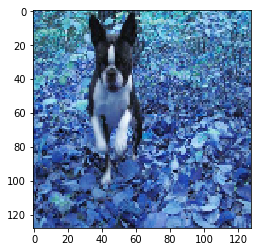

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_train_features[0])

In [22]:
y_train_results[0]

'19'

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
import numpy as np
x_train_features = np.array(x_train_features)

In [0]:
x_train_features = x_train_features.astype('float32')
x_train_features = x_train_features/255.0

In [25]:
x_train_features.shape

(10222, 128, 128, 3)

In [0]:
y_train_results = np.array(y_train_results)

In [27]:
y_train_results.shape

(10222,)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [28]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
(Xtrain,Xval,Ytrain,Yval) = train_test_split(x_train_features,y_train_results,test_size=0.20)

In [0]:
Ytrain = np_utils.to_categorical(Ytrain, num_classes=120)
Yval = np_utils.to_categorical(Yval,num_classes =120)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
samples = pd.read_csv('sample_submission.csv')

In [32]:
samples.columns

Index(['id', 'affenpinscher', 'afghan_hound', 'african_hunting_dog',
       'airedale', 'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset',
       ...
       'toy_poodle', 'toy_terrier', 'vizsla', 'walker_hound', 'weimaraner',
       'welsh_springer_spaniel', 'west_highland_white_terrier', 'whippet',
       'wire-haired_fox_terrier', 'yorkshire_terrier'],
      dtype='object', length=121)

In [0]:
test_img = samples['id']

In [34]:
test_img.head(5)

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [35]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:13<00:00, 752.69it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature = np.array(x_test_feature)
x_test_feature = x_test_feature.astype('float32')
x_test_feature = x_test_feature / 255.0

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Activation,Flatten,MaxPooling2D
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [38]:
model = Sequential()
#Basic 2 conv layers
model.add(Conv2D(32,kernel_size=(5,5),padding='same',activation='relu',input_shape =(128,128,3) ,name='conv_1'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',name='conv'))
#Dense layers of 256 and 120 neurons fully connected
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(120,activation='softmax'))
          
opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

W0630 06:45:15.075165 140605058090880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0630 06:45:15.111786 140605058090880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 06:45:15.121085 140605058090880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0630 06:45:15.210213 140605058090880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0630 06:45:15.221517 140605058090880 deprecation_wrappe

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
conv (Conv2D)                (None, 128, 128, 32)      9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 524288)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               134217984 
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
Total params: 134,260,504
Trainable params: 134,260,504
Non-trainable params: 0
_________________________________________________________________


### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
batch_size = 128
epochs = 10

In [41]:
history = model.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=epochs,validation_data=(Xval,Yval),verbose=1)

W0630 06:45:45.305685 140605058090880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0630 06:45:45.373717 140605058090880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 27s 3ms/step - loss: 4.8017 - acc: 0.0160 - val_loss: 4.7552 - val_acc: 0.0161
Epoch 2/10
8177/8177 [==============================] - 15s 2ms/step - loss: 4.6702 - acc: 0.0263 - val_loss: 4.7320 - val_acc: 0.0161
Epoch 3/10
8177/8177 [==============================] - 15s 2ms/step - loss: 4.4064 - acc: 0.0689 - val_loss: 4.7012 - val_acc: 0.0308
Epoch 4/10
8177/8177 [==============================] - 15s 2ms/step - loss: 3.8436 - acc: 0.1823 - val_loss: 4.7343 - val_acc: 0.0308
Epoch 5/10
8177/8177 [==============================] - 15s 2ms/step - loss: 2.9774 - acc: 0.3847 - val_loss: 4.9230 - val_acc: 0.0347
Epoch 6/10
8177/8177 [==============================] - 15s 2ms/step - loss: 2.0483 - acc: 0.6036 - val_loss: 5.2593 - val_acc: 0.0269
Epoch 7/10
8177/8177 [==============================] - 15s 2ms/step - loss: 1.2960 - acc: 0.7729 - val_loss: 5.6559 - val_acc: 0.0249
Epoch 8

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    data_format='channels_last')

val_datagen = ImageDataGenerator()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(Xtrain,Ytrain,batch_size=batch_size)
val_generator = val_datagen.flow(Xval,Yval,batch_size=batch_size)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [78]:
model.fit_generator(generator=train_generator,
                    steps_per_epoch=Xtrain.shape[0]//batch_size,
                    validation_data=val_generator,
                    validation_steps=Xval.shape[0]//batch_size,epochs=epochs)

Epoch 1/10
255/255 [==============================] - 37s 144ms/step - loss: 4.7602 - acc: 0.0199 - val_loss: 4.6418 - val_acc: 0.0312
Epoch 2/10
255/255 [==============================] - 36s 142ms/step - loss: 4.5855 - acc: 0.0306 - val_loss: 4.6225 - val_acc: 0.0318
Epoch 3/10
255/255 [==============================] - 36s 140ms/step - loss: 4.5281 - acc: 0.0353 - val_loss: 4.5392 - val_acc: 0.0318
Epoch 4/10
255/255 [==============================] - 36s 141ms/step - loss: 4.4718 - acc: 0.0425 - val_loss: 4.5086 - val_acc: 0.0378
Epoch 5/10
255/255 [==============================] - 36s 141ms/step - loss: 4.4233 - acc: 0.0458 - val_loss: 4.4845 - val_acc: 0.0363
Epoch 6/10
255/255 [==============================] - 36s 141ms/step - loss: 4.3885 - acc: 0.0474 - val_loss: 4.4495 - val_acc: 0.0437
Epoch 7/10
255/255 [==============================] - 36s 139ms/step - loss: 4.3559 - acc: 0.0519 - val_loss: 4.4031 - val_acc: 0.0497
Epoch 8/10
255/255 [==============================] - 3

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [81]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),include_top=False, pooling='avg')

W0630 10:20:43.741027 140605058090880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Print the summary of the base_model

In [82]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from keras import Model,Input
from keras.layers import BatchNormalization,Flatten

In [0]:
x = base_model.output
#x = Flatten()(x)
x = BatchNormalization()(x)
x = Dropout(0.35)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.15)(x)
predictions = Dense(120, activation='softmax')(x)

# this is the model we will train

model_t = Model(inputs=base_model.input, outputs=predictions)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers:
    layer.trainable = False

In [0]:
model_t.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"]
              )

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [0]:
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')


callbacks = [early_stopping]

In [102]:
history = model_t.fit(Xtrain,Ytrain,batch_size=batch_size,epochs=50,validation_data=(Xval,Yval),verbose=1,callbacks=callbacks)

Train on 8177 samples, validate on 2045 samples
Epoch 1/50
8177/8177 [==============================] - 18s 2ms/step - loss: 2.1656 - acc: 0.4315 - val_loss: 3.5164 - val_acc: 0.2289
Epoch 2/50
8177/8177 [==============================] - 18s 2ms/step - loss: 2.0325 - acc: 0.4625 - val_loss: 3.6394 - val_acc: 0.2225
Epoch 3/50
8177/8177 [==============================] - 17s 2ms/step - loss: 1.9283 - acc: 0.4950 - val_loss: 3.6173 - val_acc: 0.2166
Epoch 4/50
8177/8177 [==============================] - 17s 2ms/step - loss: 1.7845 - acc: 0.5207 - val_loss: 3.7734 - val_acc: 0.2034
Epoch 5/50
8177/8177 [==============================] - 17s 2ms/step - loss: 1.7143 - acc: 0.5386 - val_loss: 3.8578 - val_acc: 0.2054
Epoch 6/50
8177/8177 [==============================] - 18s 2ms/step - loss: 1.6456 - acc: 0.5646 - val_loss: 3.8726 - val_acc: 0.2112
Epoch 00006: early stopping


In [103]:
model_t.fit_generator(generator=train_generator,
                    steps_per_epoch=Xtrain.shape[0]//batch_size,
                    validation_data=val_generator,
                    validation_steps=Xval.shape[0]//batch_size,epochs=epochs,callbacks=callbacks)

Epoch 1/10
255/255 [==============================] - 35s 135ms/step - loss: 3.3061 - acc: 0.2373 - val_loss: 3.5816 - val_acc: 0.2126
Epoch 2/10
255/255 [==============================] - 33s 130ms/step - loss: 3.1492 - acc: 0.2529 - val_loss: 3.6003 - val_acc: 0.2059
Epoch 3/10
255/255 [==============================] - 33s 130ms/step - loss: 3.0750 - acc: 0.2659 - val_loss: 3.6613 - val_acc: 0.2111
Epoch 4/10
255/255 [==============================] - 33s 128ms/step - loss: 3.0349 - acc: 0.2783 - val_loss: 3.5511 - val_acc: 0.2106
Epoch 5/10
255/255 [==============================] - 32s 127ms/step - loss: 2.9742 - acc: 0.2839 - val_loss: 3.6423 - val_acc: 0.2156
Epoch 6/10
255/255 [==============================] - 33s 128ms/step - loss: 2.9543 - acc: 0.2845 - val_loss: 3.5892 - val_acc: 0.2047
Epoch 7/10
255/255 [==============================] - 32s 127ms/step - loss: 2.9082 - acc: 0.2969 - val_loss: 3.6223 - val_acc: 0.2101
Epoch 8/10
255/255 [==============================] - 3